## Question 2

This section of our research is devolved to the following research question:   
`How do movie genre preferences differ between countries in conflict or those experiencing similar global events?`   
in which we investigate variations in genre trends across nations, focusing on contrasts during political tensions and on how different nations respond to similar historical events.

### Imports

In [1]:
from src.utils.utils_movie import *
from src.utils.utils_wars import *
from src.utils.interactive_plots import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = load_data_movies(movies_path_base)
wars = load_data_wars(wars_path_base)

In [3]:
movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]",4.9,58872,14010832.0,98.0,['English Language'],[United States of America],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,['German Language'],[Germany],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"[Costume drama, War film, Epic, Period piece, ...","[Biography, Drama, History]",7.5,32088,10161099.0,137.0,['English Language'],[United Kingdom],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."


In [4]:
wars.drop(columns=["BatDeath", "Outcome"], inplace=True)
wars.head()

,StateName,Side,StartYear,EndYear,WhereFought,Movies
WarName,,,,,,
Second Sino-Japanese,Japan,1,1931,1933,7,931
Second Sino-Japanese,China,2,1931,1933,7,931
Chaco,Bolivia,2,1932,1935,1,1198
Chaco,Paraguay,1,1932,1935,1,1198
Saudi-Yemeni,Saudi Arabia,1,1934,1934,6,806


In [5]:
conflicts_to_check = []
war_names = list(set(sorted(wars.index)))
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war = find_movies_year(movies, start_year, end_year)
    movies_war_1 = find_movies_side(movies_war, side_1)
    movies_war_2 = find_movies_side(movies_war, side_2)
    if movies_war_1 is not None and movies_war_2 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

Changkufeng
Second Sino-Japanese
Taiwan Straits
War over the Aouzou Strip
Second Laotian, Phase 2
Saudi-Yemeni
Off-shore Islands
Turco-Cypriot
Kargil War
First Kashmir
IfniWar
Vietnamese-Cambodian
Ugandian-Tanzanian
Arab-Israeli
Franco-Thai
Vietnam War, Phase 2
Cenepa Valley
Soviet Invasion of Hungary
Badme Border
Gaza-Israel conflict
Invasion of Iraq
First Libyan Civil War
Korean
Sinai War
Sino-Vietnamese Punitive
War of Attrition
War over Lebanon
Assam
Iran-Iraq
War for Kosovo
Gulf War
Falkland Islands
Bangladesh
Sino-Vietnamese Border War
Third Sino-Japanese
Communist Coalition
Russo-Finnish
Second Ogaden War, Phase 2
World War II
Yom Kippur War
War over Angola
Six Day War
Cold War
Football War
Azeri-Armenian
Heglig Crisis
Second Kashmir
Conquest of Ethiopia
Bosnian Independence
Russo-Georgian War
Nomonhan
Chaco
Invasion of Afghanistan
The conflicts to check are ['Second Laotian, Phase 2', 'Kargil War', 'Vietnam War, Phase 2', 'Invasion of Iraq', 'Korean', 'Sinai War', 'Sino-Vietnam

Out of the list of conflicts obtained this way, we will focus our analysis on a subset of them, made of the ones with the highest historical importance and the highest amount of data in the dataset.   
The 4 conflicts we will focus on will be `Cold War`, `Korean War`, `Vietnam War` and `World War II`.

### Geographical Illustration

In this section we give a quick overview of the analyzed conflicts, by showing for each country a world map showing the countries on each side of the conflict. This distinction between `Side 1` (Red) and `Side 2` (Blue) will be important for a deeper understanding of the following sections.

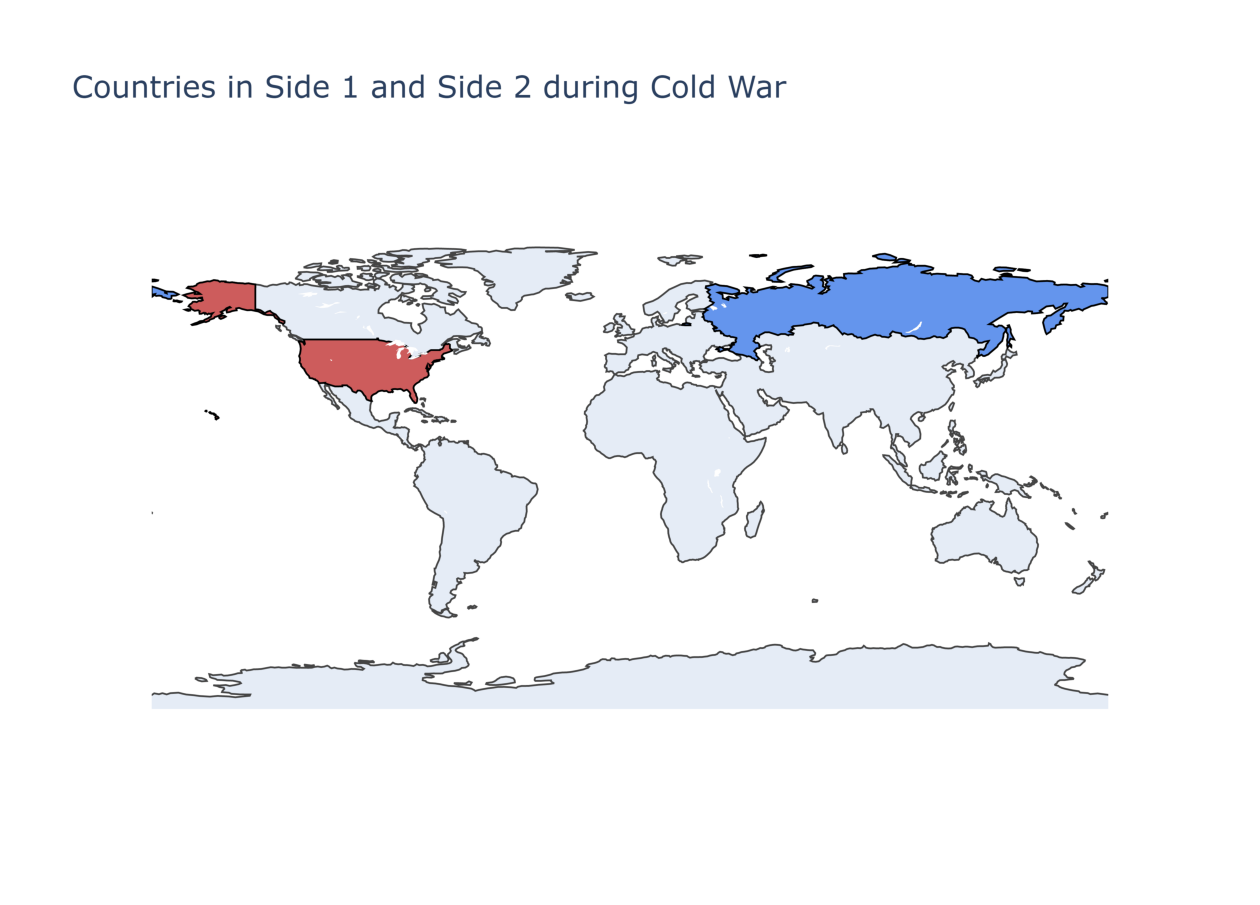

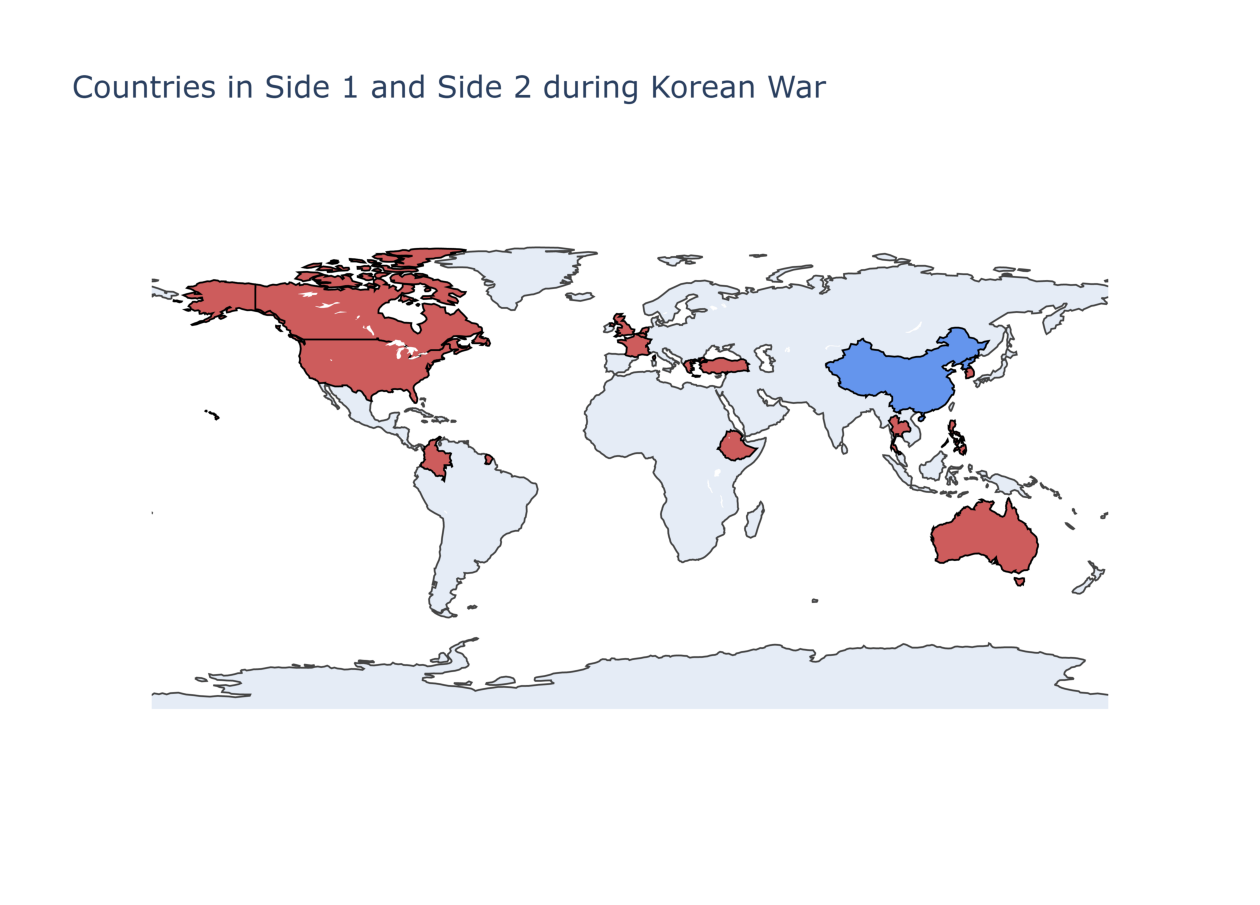

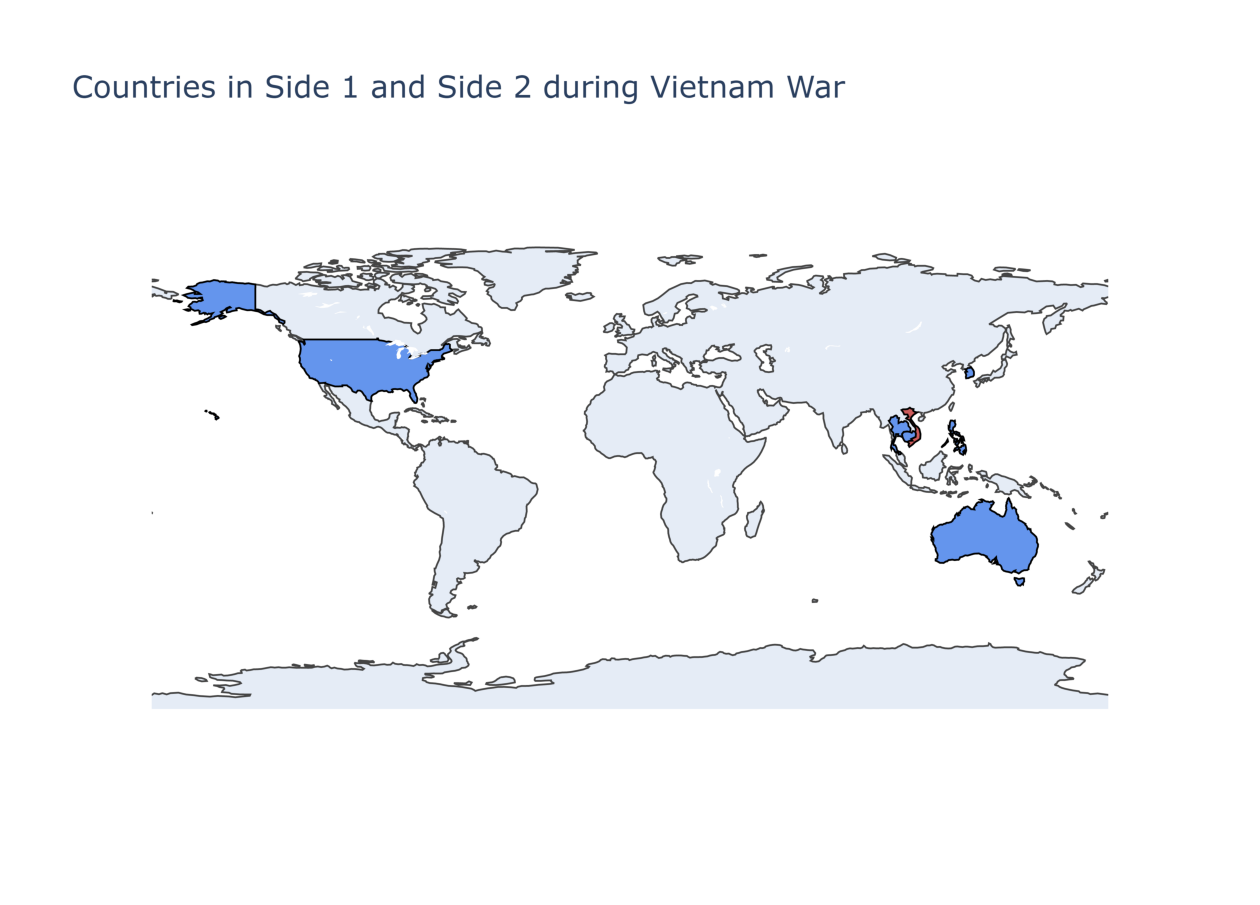

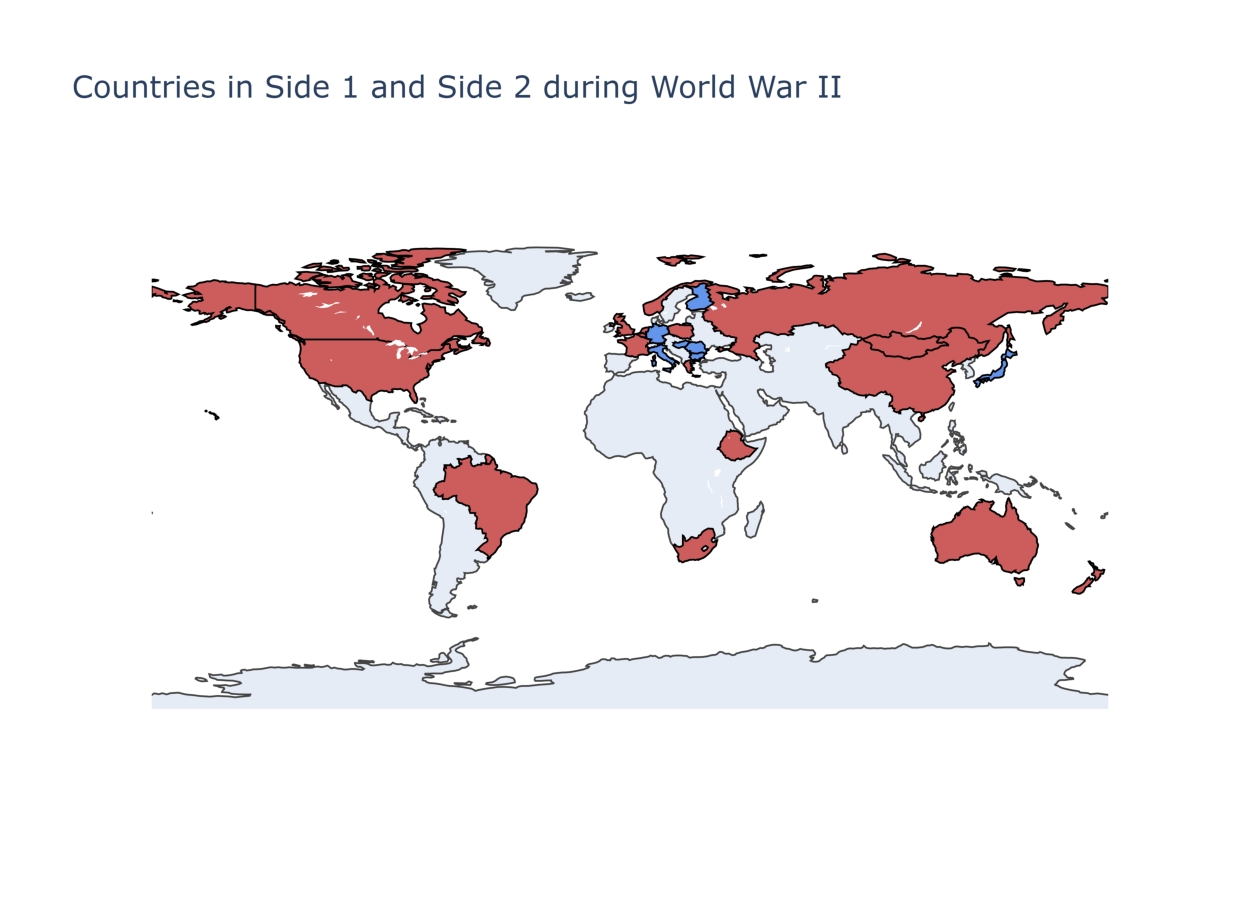

In [6]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    side_1, side_2 = find_sides(wars[wars.index==war])
    plot_countries(side_1, side_2, war)

### Timeline Illustration

Another plot helpful in the understanding of the setting of the analysis is the following timeline, which aims to show the number of movies produced over the course of the years relative to each one of the considered conflicts. To obtain the plot, we filter the dataset based on the `summary` column, looking for the name of the conflict (or abbreviations, such as WW2):

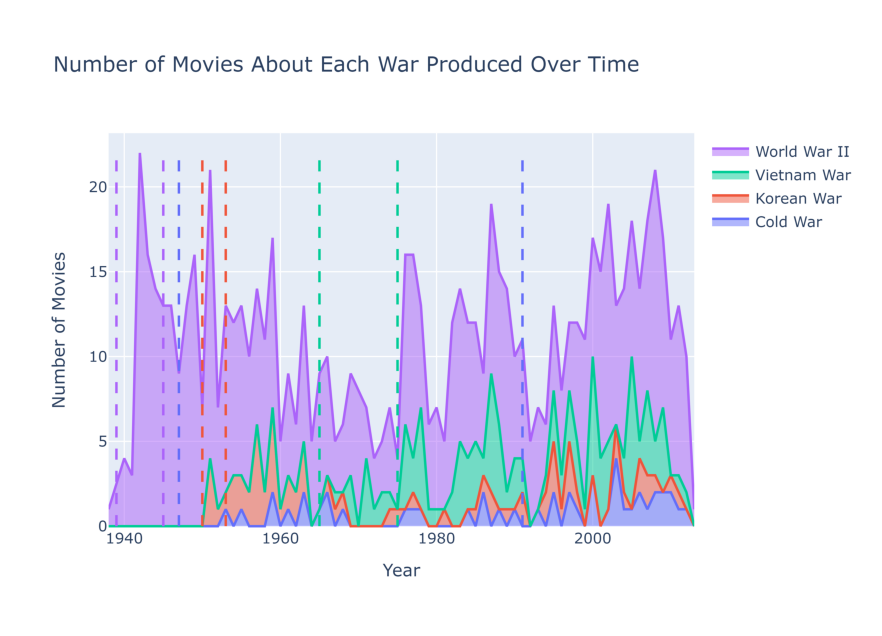

In [7]:
plot_movies_timeline(wars, movies, war_names_r, True)

The plot shows a large area associated to movies related to `World War II`, much larger than that of all other conflicts combined. This highlights the influence a conflict of such scale has had on the world even further in the future.   
A more in-depth inspection of the graph shows how, despite the general movies trend are characterized by an overall increase in movies produced every year, the peak in production of WWII movies has peaked during the conflict itself, to then decrease gradually over time to then settle between 10-15 movies a year in the XXI century.   
Movies on the `Vietnam War` were not produced inconsistently across all years starting from the war, reaching their peak in 2005 with 9 movies.   
The `Korean War` has had its highest movies production in the period right after the war, in the 1950s, after which it hasn-t received much attention in the cinematographic world, achieving at most 3 movies per year ever since.   
Finally, contrary to our expectations, the `Cold War` itself didn't get much attention during the course of the years, with no more than 4 movies produced in a given year making it the lowest in our analysis.

### Quantitative Analysis

The final introductive plot of this section is a sunburst chart which depicts for each war where the movies obtained by the previous filtering are produced, using the same division between `Side 1` and `Side 2` as in the section for `Geographical Illustration`.   
This section is mainly aimed at depicting a comparison between the way the opposing countries in the war (as well as the ones not directly involved) were influenced by the conflicts, in terms of a purely quantitative rather than qualitative analysis.   
For each of the following plots, the `Red` section corresponds to `Side 1`, the `Blue` one to `Side 2` and the `Green` one to movies produced in `other countries`.

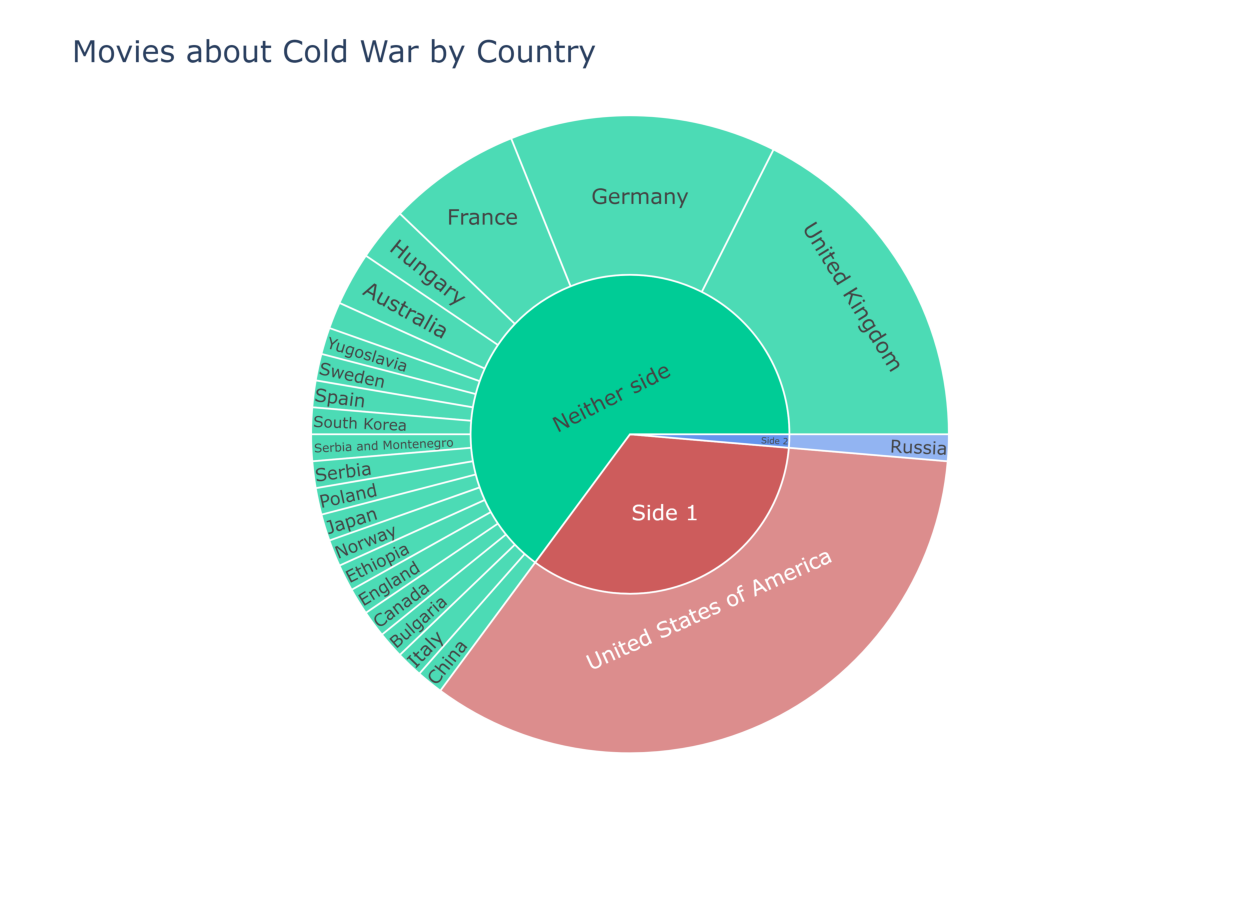

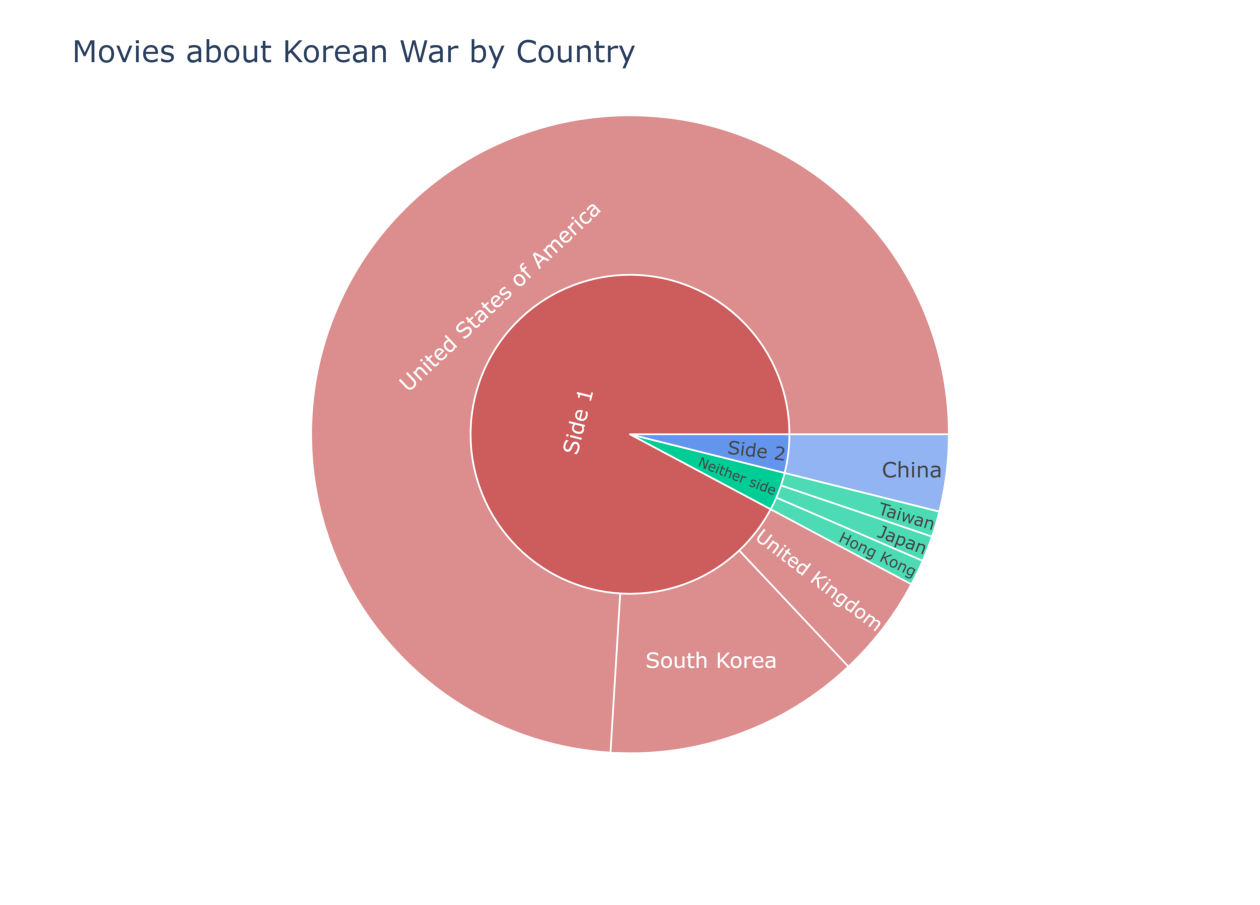

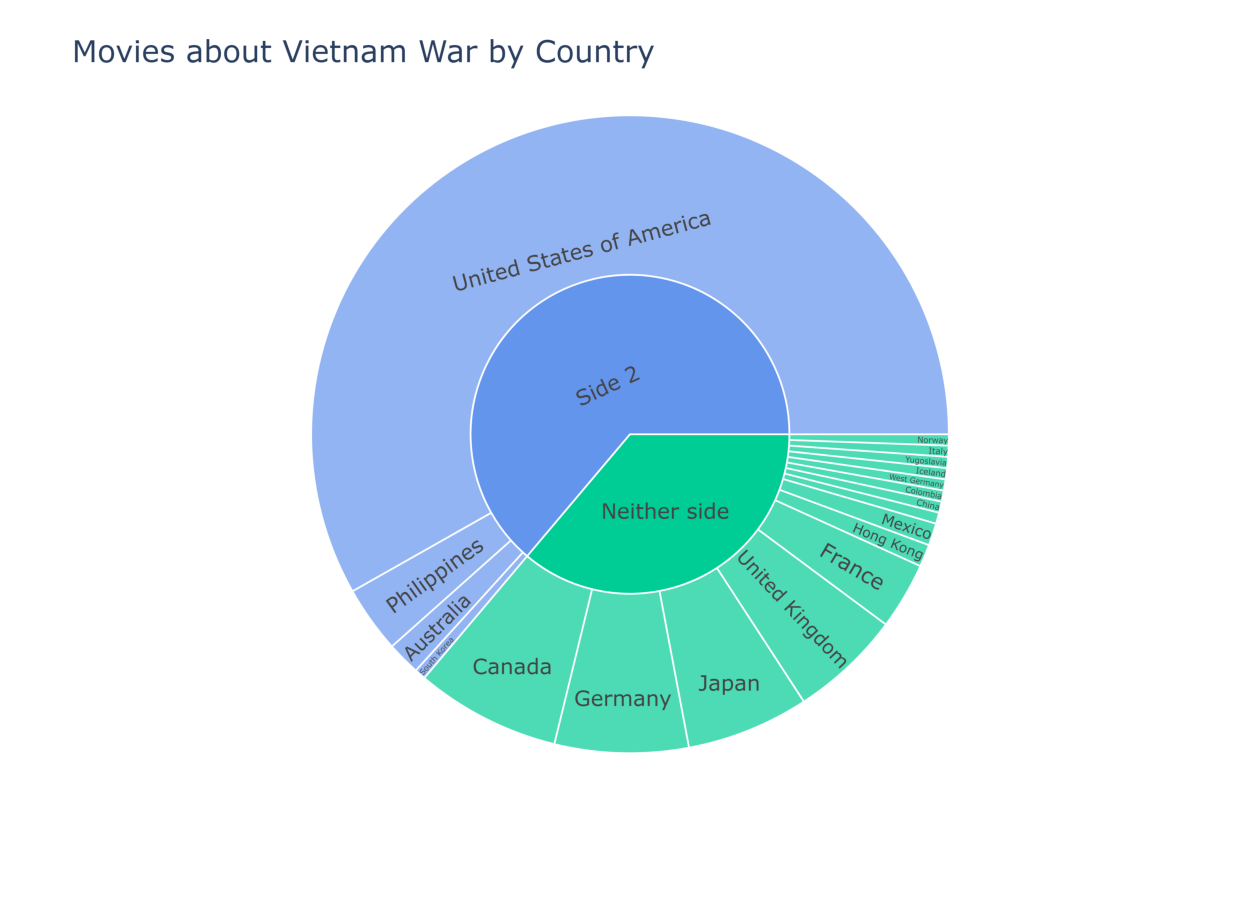

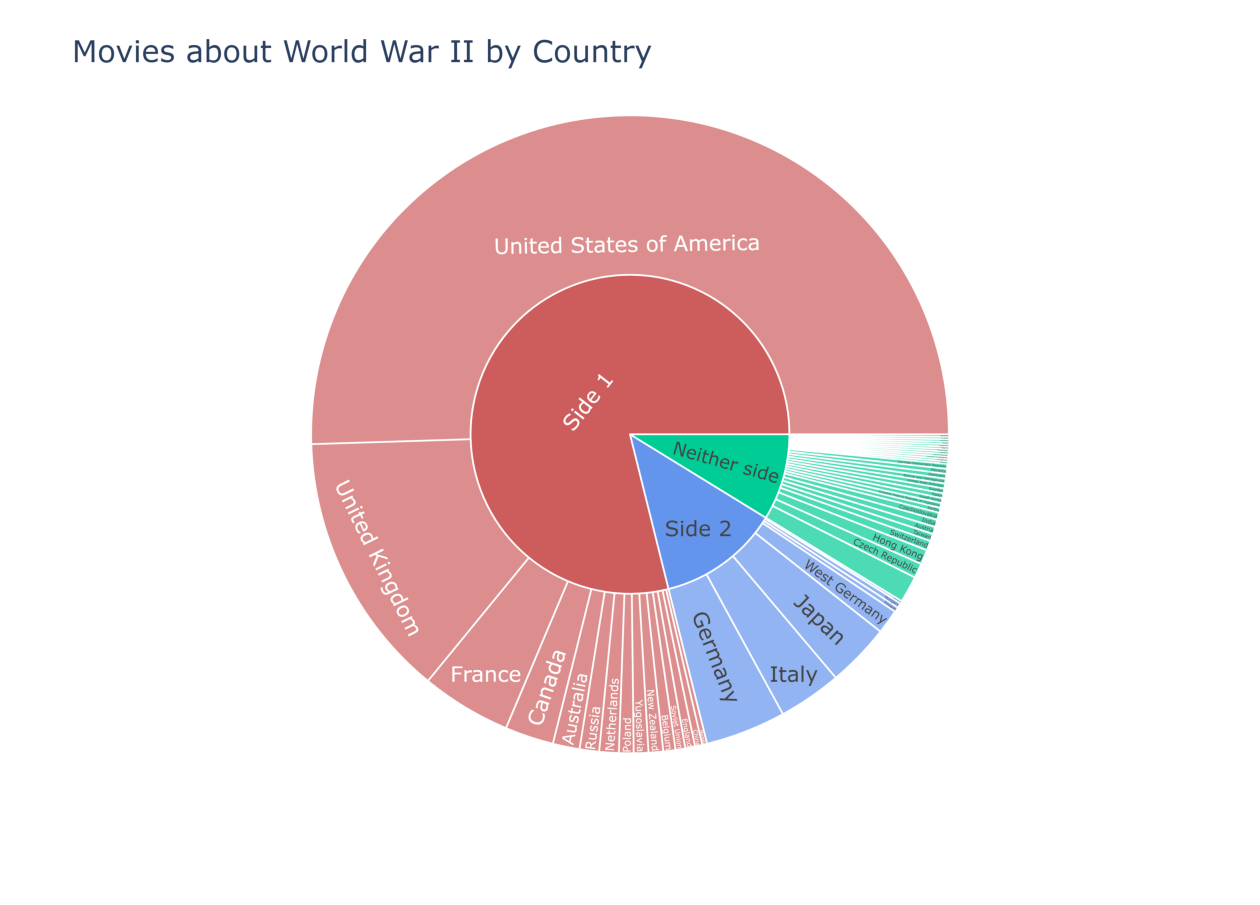

In [8]:
for war in war_names_r:
    plot_country_piechart(wars, movies, war)

A comment which can be made for each of these graphs is that United States take up the largest slice of the chart divided by countries, and this is largely due to the fact that the United States contribute in the largest amount to all movies produced, regardless of the topic.   

Entering more in detail, we see that for the `Cold War` the largest part of the movies were produced by countries not directly involved in the conflict, showing how such a conflict has impacted the whole world and not only the two opposing sides. As stated before, the USA contribute to the largest part of the movies, while Russia, despite being one of the two involved countries, only amounts to a single movie in our chart, surpassed by the large european countries such as Germany, UK and France.

Once again, for the `Korean War`, most of the movies were produced by the USA, but if we exclude its contribution we can see that South Korea, one of the countries directly involved in the conflict, is the largest producer of movies on the conflict. Follow the UK and China, alongside some other Asian countries.

For the `Vietnam War` we can see from the chart that no movies about it were released in Vietnam, only country directly involved in the war as "Side 2" in our dataset, while the movies are almost equally distributed among the various countries (as usual, exception made for the USA).

Finally, regarding `World War II`, we can see that the largest forces of the conflict lead the movie production, with the USA having released more than 400 movies, the UK more than 100 and countries such as France, Germany, Italy and Japan all with more than 20 movies each.
On top of this, the massive influence of the conflict can also be seen from the large number of smaller countries having released some movies about it, with movies released in more than 50 countries in total!

### Movie Genres by Depicted Country

In this and the following sections we delve deeper in the qualitative analysis and comparison between the two sides of the conflicts, analyzing the different distribution in movie genres for different subsets of the Movies dataset.   
Here we provide a first analysis by filtering our dataset based on the movies released in a historical period around each of the analyzed war, and check what is the movie genre of the movies depicting countries from either side of the conflict.   
To do this we first filter the dataset for movies released in a period of time of 2 years around the conflict by looking at the `Year` column, after which we filter the dataset once again based on the `Summary` column, but this time we look for movies mentioning the countries on either side (an alternative approach would be to look for movies released in such countries in this same timeframe, but this ends up reducing the dataset size too much and not providing enough data for any result).   
We plot our results in two barplots, one for each side of the war, each one showing not only the genre distribution for that period of time but also the genre distribution over the whole dataset, to provide through comparison additional information about the way this sentiment changed overtime.   

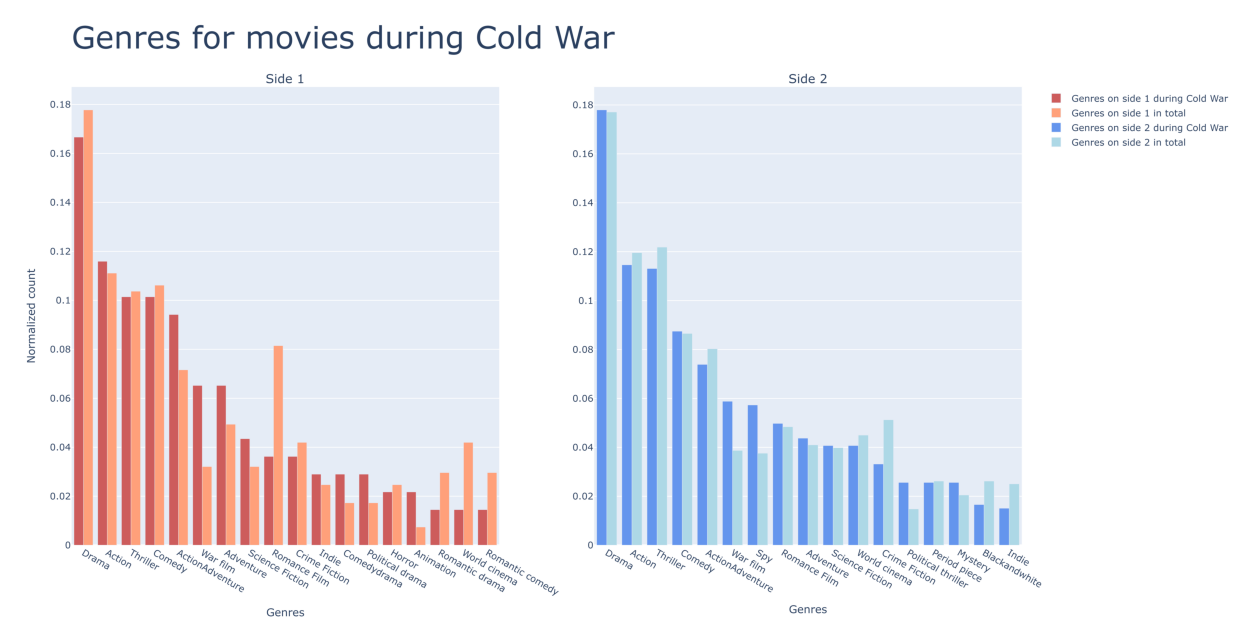

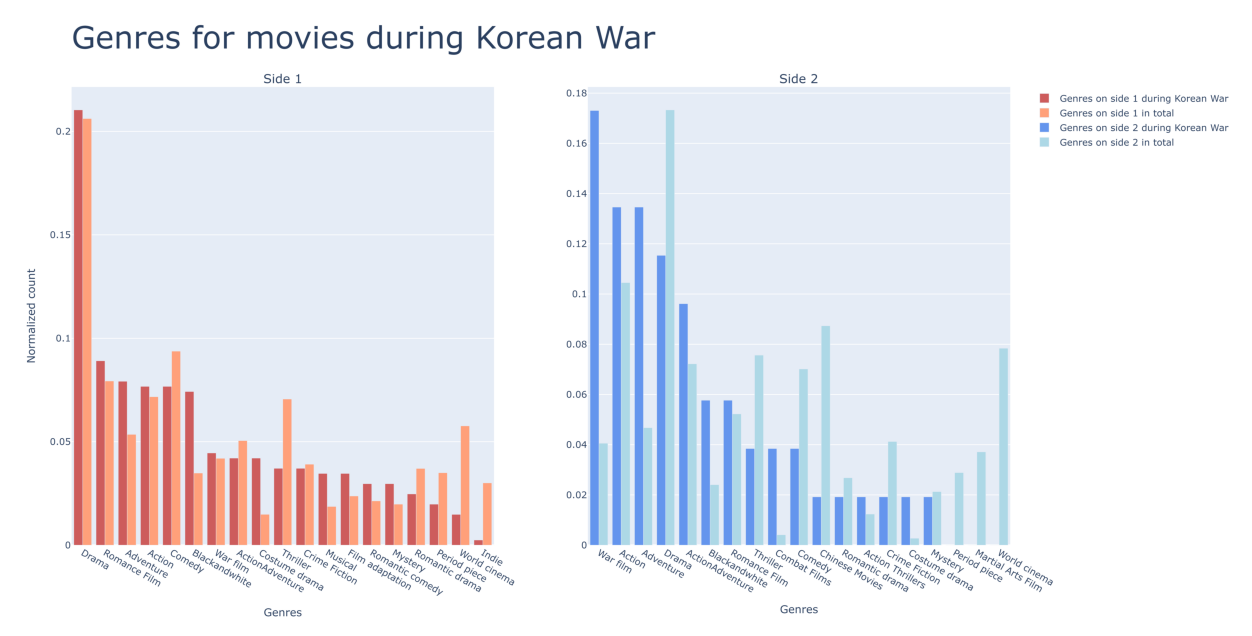

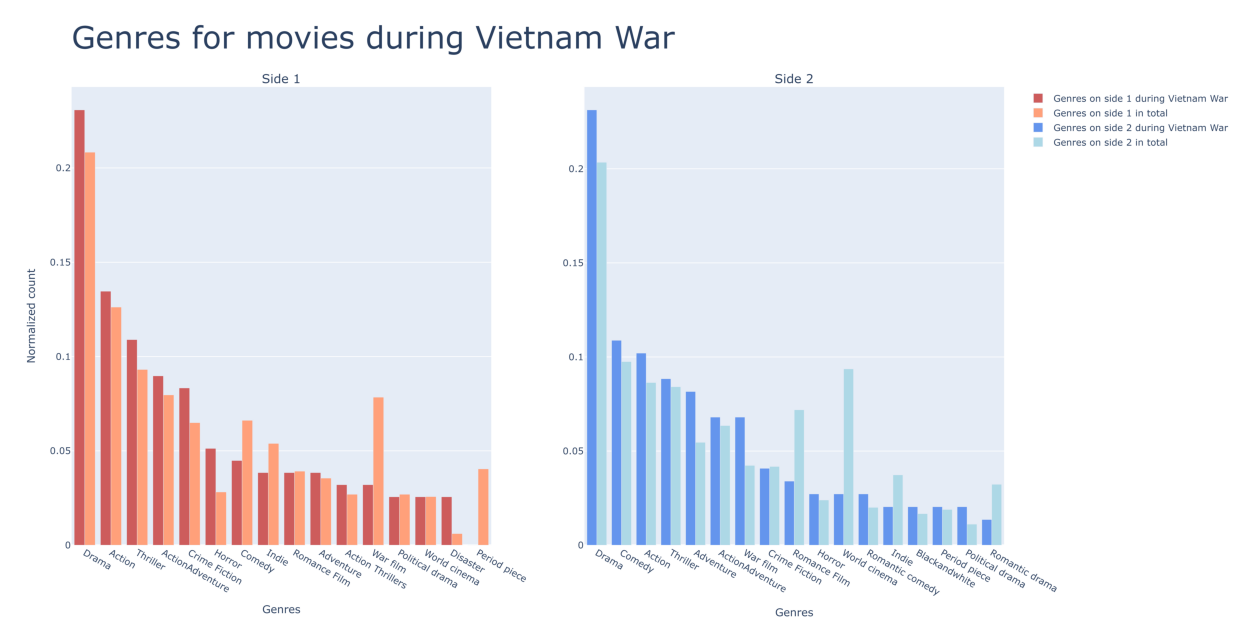

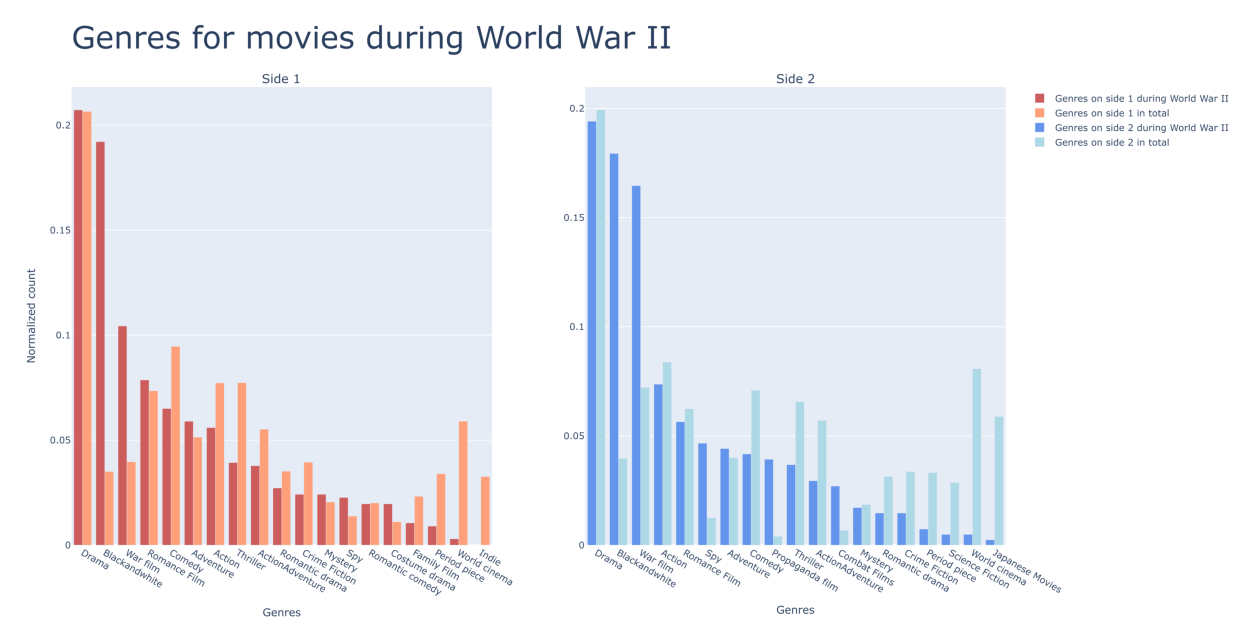

In [9]:
for war in war_names_r:
    plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="summary"))
    # plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="country"))

A first look at the plot makes it easy to see that genres like `Drama` are the most common overall, wo we will not consider these common trends in the analysis, but we will focus more on the distinctions between the two sides and between the specific time period vs the entire dataset.

During the `Cold War`, on Side 1 genres like Adventure, ActionAdventure, and War Films show a significant increase compared to the whole dataset, while genres related to romance are less common in this period of time. On Side 2, instead, Spy films and War films stood out more, alongside Political Thrillers, suggesting themes of espionage and historical reflection, themes fairly common in the sentiment of the time. 

During the `Korean War`, a common trend between the two sides was the large presence of BlackandWhite movies, which is mainly to attribute to an historical reason rather than a Geopolitical one. On Side 1, there was a strong emphasis on Romance Films and Adventure films, while Side 2 leaned more into violent themes, such as War Films (which are the most present in this reduced dataset) and Combat Films, highlighting themes of conflict and cultural representation.

The `Vietnam War` era saw a general increase in genres like Action, Thriller, and War Films, emphasizing the conflict's intensity, but the specific response of the two sides was quite different: Side 1 had a much stronger increase in genres like Crime Fiction, Horror and Disaster compared to all other subsets of data analyzed so far, underlying the climate of tension in Vietnam in particular in this period of time. Side 2, on the other hand, had changes more in line with the general trends, with Action, Adventure and War films being more present while Romance and World cinema are less common overall.

Finally, during `World War II`, we see once again the trend for  BlackandWhite films dominating the genre landscape on both sides compared to the overall dataset, once again associated to the analyzed historical period. What characeterizes this period the most is the sharp increase in War Films, which see by far the largest increase, with Spy movies being also fairly common on both sides. On top of this, genres like Adventure and Romance Films were still prominent, reflecting themes of heroism and human struggle. 
The most distinctive trend betwee the two sides is the presence of Propaganda Films on Side 2, alongside genres like Japanese Movies which are instead causes by a purely geographical connotation.

### Movie Genres by Country of Production

This final section of the comparative analysis between countries focuses more on the way the conflict is portrayed in movies produced in different countries. This section applies the same filtering as the one on `Quantitative Analysis`, but goes in depth analyzing the differences in genre between the two movie subsets, although this analysis often times ended up being difficult due to the limited sizes of the sub-datasets.

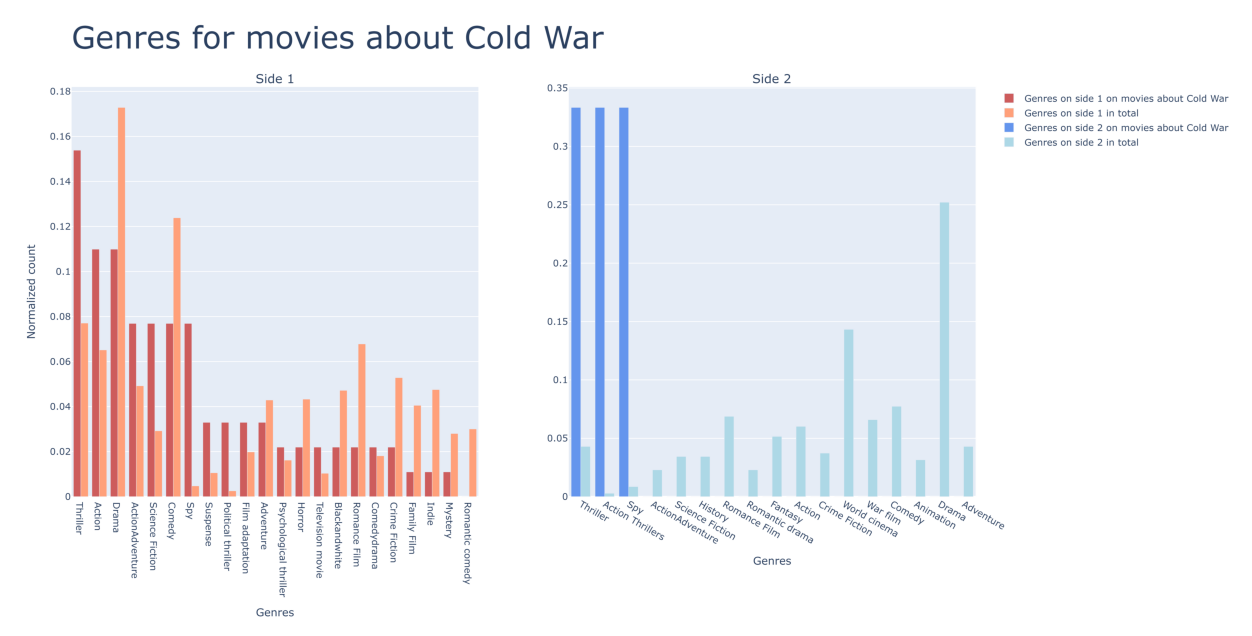

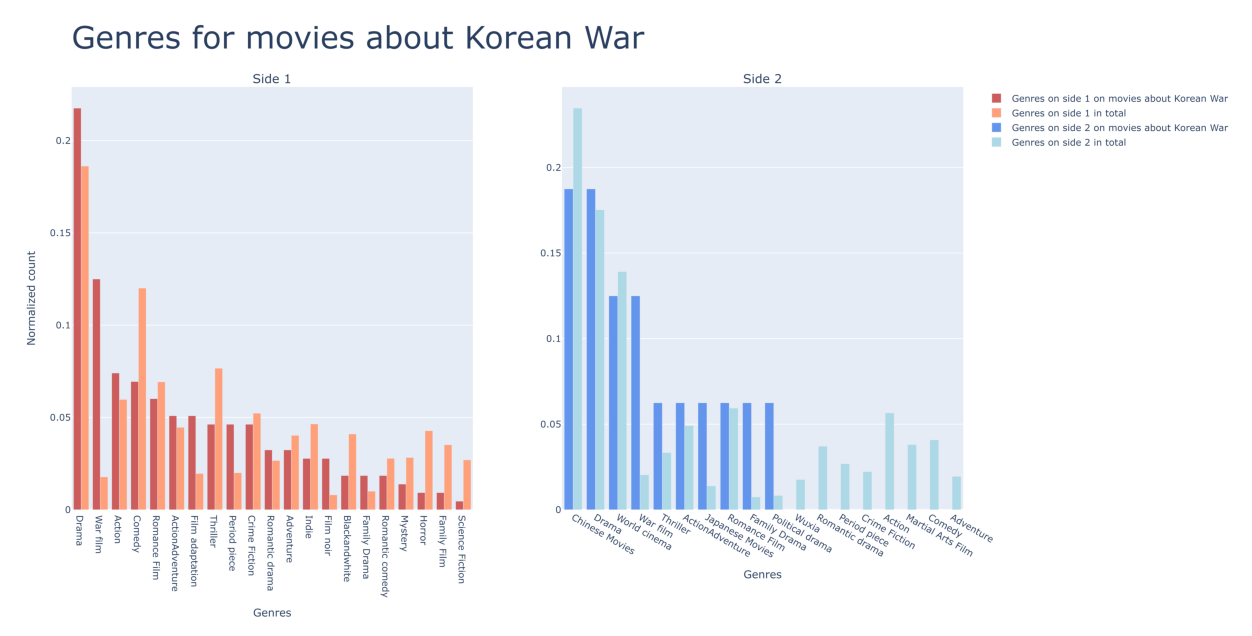

Not Enough Data


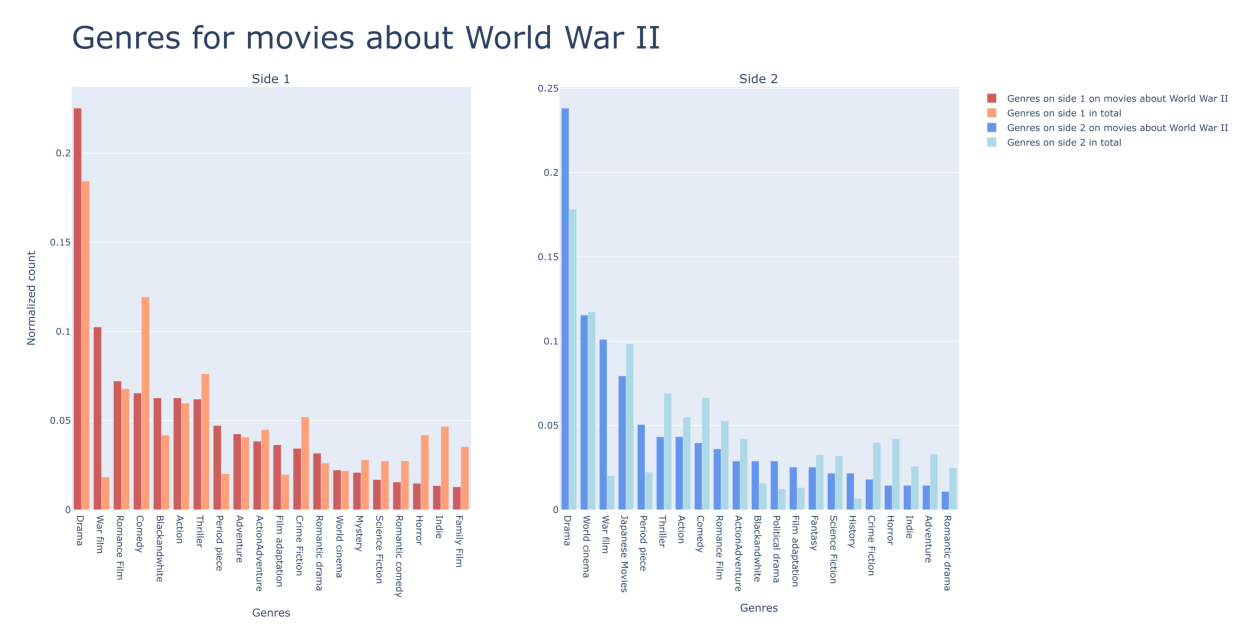

In [10]:
for war in war_names_r:
    plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="country"))
    # plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="summary"))

As stated in the introduction to this section, the fisrt thing  to notice is the fact that for both `Cold War` and `Korean War` one side has much fewer movies compared to the other, while for the `Vietnam War` not enough movies were found for one of the two sides, hence no plot was produced. This leads to a the results relative to these plots less significant overall, but we decided to still mention them for completeness.

The plot for the `Cold War` shows lines of regular heigths in the histogram, due to the small amount of movies plotted. Other than this, the trends in the plot are to be expected, with genres like Thriller and Spy being the most represented in both sides, but a weird-to-explain entry is the presence of Comedy films on Side 1.   
Movies about the `Korean War` show much more different genres on Side 1, while on Side 2 we see a strong geographical component in the genres, with Chinese and Japanese Movies being common.   
Finally, movies about `World War II` are the ones associated with the largest number of movies, information which can also be extracted by the "smoothness" of the histogram distribution. Both sides share a large variety of genres for the movies, with War films and Period Piece being the most significant ones in terms of comparison with the whole dataset, but no significant difference between the two sides can be extracted from he plot.

In general this plots underline how the general sentiment associated to the movies produced during the war and movies which directly reference the war are usually quite serious and tense, so we decided to go more in depth with the analysis of the sentiment of the storytelling, suing techniques derived from Natural Language Processing (NLP).